In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [8]:
tickers = ['TSLA', 'AAPL', 'NVDA']
sp500 = pd.read_csv('constituents.csv')
sp500 = sp500['Symbol']
print(sp500)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     XYL
499     YUM
500    ZBRA
501     ZBH
502     ZTS
Name: Symbol, Length: 503, dtype: object


In [10]:


# Source: yfinance documentation linking to StackOverflow guide
# https://stackoverflow.com/questions/63107594/how-to-deal-with-multi-level-column-names-downloaded-with-yfinance/63107801#63107801

rows_X = []
rows_Y = []
for ticker in sp500:
    daily_data = yf.download(ticker,  period='30d', interval='1d', rounding=True)
    weekly_data = yf.download(ticker,  period='6mo', interval='1wk', rounding=True)

    if daily_data.empty:
        continue

    d_opens = daily_data['Open'].astype(float).values
    d_closes = daily_data['Close'].astype(float).values
    d_changes = d_opens - d_closes
    
    d_avg = np.mean(d_changes)
    d_std = np.std(d_changes)
    d_standardized = [(d_changes[i] - d_avg) / d_std for i in range(len(d_changes))] # Standardize the data to mean 0 and std of 1

    w_opens = weekly_data['Open'].astype(float).values
    w_closes = weekly_data['Close'].astype(float).values
    w_changes = w_opens - w_closes
    w_avg = np.mean(w_changes)
    w_std = np.std(w_changes)
    w_standardized = [(w_changes[i] - w_avg) / w_std for i in range(len(w_changes))] # Standardize the data to mean 0 and std of 1
    
    row = [ticker] + [float(d_standardized[i]) for i in range(1,len(d_standardized))] + [float(x) for x in w_standardized] # Add ticker column
    y = float(w_standardized[0])
    rows_X.append(row)
    rows_Y.append(y)

daily_cols = [f"d-{i+1}" for i in range(1, len(d_opens))]
weekly_cols = [f"w-{i+1}" for i in range(len(w_opens))]
cols = ['ticker'] + daily_cols + weekly_cols
df = pd.DataFrame(rows_X, columns=cols)

rows_Y = [1 if x > 0 else 0 for x in rows_Y]
input = df.iloc[:, 1:]
print(input)
print(rows_Y)


C:\Users\benji\AppData\Local\Temp\ipykernel_10064\527676969.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  daily_data = yf.download(ticker,  period='30d', interval='1d', rounding=True)
[*********************100%***********************]  1 of 1 completed
C:\Users\benji\AppData\Local\Temp\ipykernel_10064\527676969.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  weekly_data = yf.download(ticker,  period='6mo', interval='1wk', rounding=True)
[*********************100%***********************]  1 of 1 completed
C:\Users\benji\AppData\Local\Temp\ipykernel_10064\527676969.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  row = [ticker] + [float(d_standardized[i]) for i in range(1,len(d_standardized))] + [float(x) for x in w_standardized] # A

          d-2       d-3       d-4       d-5       d-6       d-7       d-8  \
0   -0.688197 -2.299502  0.086791  1.647918 -1.284770 -1.987277 -1.162110   
1   -0.253566 -0.611075  0.282697  1.295638 -1.286370 -1.177131 -0.918930   
2    0.550037 -0.148973  2.007547  0.550037 -3.346573 -1.227234 -0.409243   
3    0.498830 -3.355765  0.457604  3.223156 -1.153630 -0.830696 -0.408134   
4    0.927309 -2.232119 -0.189702  0.519641 -1.159952 -0.051094 -1.408629   
..        ...       ...       ...       ...       ...       ...       ...   
496  0.799486 -0.153544  0.277589  1.230619 -1.503669 -1.231375 -1.469633   
497  0.654370  0.148324  0.776519  0.139599 -1.614112 -0.479871 -2.015458   
498  0.401759 -2.596627 -0.295353  0.646690 -0.214606 -0.577965 -1.035529   
499 -0.158312 -1.665225  0.496415  1.587628 -1.207955  0.132678  0.174248   
500  1.058394 -0.233162  0.278345  2.311586 -1.605706 -0.569904 -0.714831   

          d-9      d-10      d-11  ...      w-18      w-19      w-20  \
0  


C:\Users\benji\AppData\Local\Temp\ipykernel_10064\527676969.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  row = [ticker] + [float(d_standardized[i]) for i in range(1,len(d_standardized))] + [float(x) for x in w_standardized] # Add ticker column
C:\Users\benji\AppData\Local\Temp\ipykernel_10064\527676969.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(w_standardized[0])


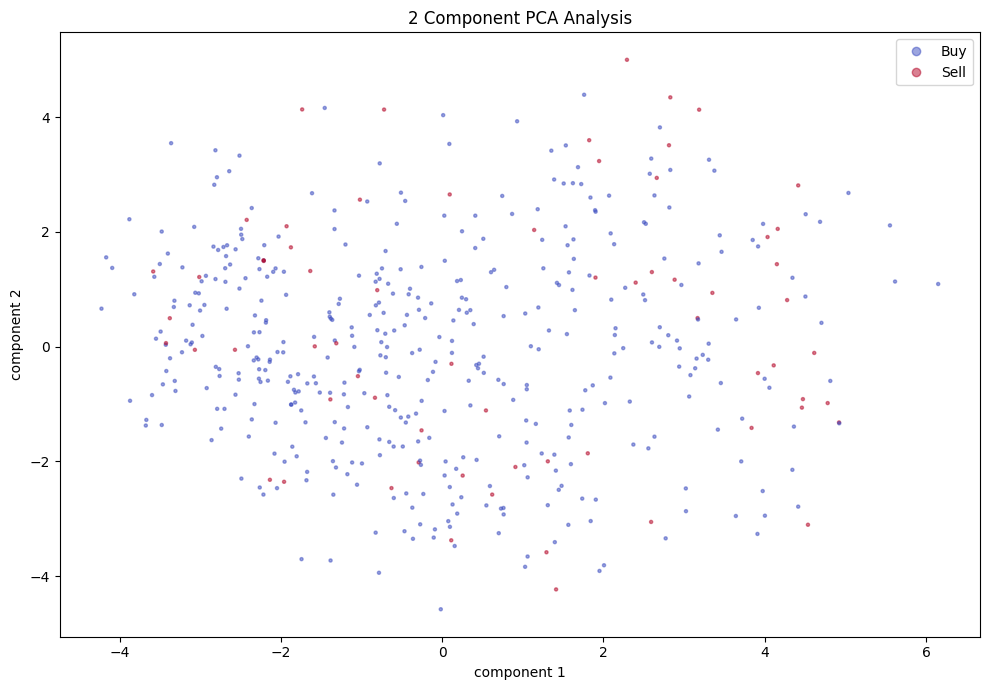

In [11]:
pca = PCA(n_components=2)
results = pca.fit_transform(input)

plt.figure(figsize=(10,7))
scatter = plt.scatter(results[:,0], results[:, 1], c=rows_Y, cmap=plt.cm.coolwarm, alpha=0.5, s=5)
plt.title("2 Component PCA Analysis")
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.legend(handles=scatter.legend_elements()[0], labels=['Buy', 'Sell'])
plt.tight_layout()
plt.show()

In [ ]:
# Download specific data related to a ticker
TSLA = yf.Ticker('TSLA')
TSLA.option_chain('2025-06-20') # String format YYYY-MM-DD of expiration of contracts


Options(calls=          contractSymbol             lastTradeDate  ...  contractSize  currency
0    TSLA250620C00005000 2025-06-18 19:32:03+00:00  ...       REGULAR       USD
1    TSLA250620C00010000 2025-06-18 15:22:16+00:00  ...       REGULAR       USD
2    TSLA250620C00015000 2025-06-18 13:51:55+00:00  ...       REGULAR       USD
3    TSLA250620C00020000 2025-06-18 15:22:06+00:00  ...       REGULAR       USD
4    TSLA250620C00025000 2025-06-18 15:21:00+00:00  ...       REGULAR       USD
..                   ...                       ...  ...           ...       ...
185  TSLA250620C00920000 2025-06-16 13:30:05+00:00  ...       REGULAR       USD
186  TSLA250620C00930000 2025-05-30 19:55:24+00:00  ...       REGULAR       USD
187  TSLA250620C00940000 2025-06-16 15:47:14+00:00  ...       REGULAR       USD
188  TSLA250620C00950000 2025-06-05 18:25:39+00:00  ...       REGULAR       USD
189  TSLA250620C00960000 2025-06-18 14:59:17+00:00  ...       REGULAR       USD

[190 rows x 14 columns], 

In [ ]:
TSLA.balance_sheet

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,NaN,0.0,NaN,NaN,NaN
Ordinary Shares Number,3216000000.0,3185000000.0,3164000000.0,3099000000.0,NaN
Share Issued,3216000000.0,3185000000.0,3164000000.0,3099000000.0,NaN
Total Debt,13623000000.0,9573000000.0,5748000000.0,8873000000.0,NaN
Tangible Book Value,71443000000.0,62019000000.0,44111000000.0,28472000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,36563000000.0,29094000000.0,22185000000.0,17707000000.0,NaN
Other Short Term Investments,20424000000.0,12696000000.0,5932000000.0,131000000.0,NaN
Cash And Cash Equivalents,16139000000.0,16398000000.0,16253000000.0,17576000000.0,NaN
Cash Equivalents,1753000000.0,495000000.0,2288000000.0,9548000000.0,NaN


In [ ]:
TSLA.income_stmt

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-136800000.0,0.0,-14080000.0,2970000.0,NaN
Tax Rate For Calcs,0.2,0.21,0.08,0.11,NaN
Normalized EBITDA,15392000000.0,14796000000.0,17833000000.0,9598000000.0,NaN
Total Unusual Items,-684000000.0,0.0,-176000000.0,27000000.0,NaN
Total Unusual Items Excluding Goodwill,-684000000.0,0.0,-176000000.0,27000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,7130000000.0,14999000000.0,12583000000.0,5524000000.0,NaN
Reconciled Depreciation,5368000000.0,4667000000.0,3747000000.0,2911000000.0,NaN
Reconciled Cost Of Revenue,80240000000.0,79113000000.0,60609000000.0,40217000000.0,NaN
EBITDA,14708000000.0,14796000000.0,17657000000.0,9625000000.0,NaN
EBIT,9340000000.0,10129000000.0,13910000000.0,6714000000.0,NaN


In [ ]:
TSLA.actions

,Dividends,Stock Splits
Date,,
2020-08-31 00:00:00-04:00,0.0,5.0
2022-08-25 00:00:00-04:00,0.0,3.0
